In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from matplotlib import pyplot as plt

In [33]:
data = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Fruits.csv")
data.head()

,Fruit Category,Fruit Name,Fruit Weight,Fruit Width,Fruit Length,Fruit Colour Score
0,1,Apple,192,8.4,7.3,0.55
1,1,Apple,180,8.0,6.8,0.59
2,1,Apple,176,7.4,7.2,0.60
3,1,Apple,178,7.1,7.8,0.92
4,1,Apple,172,7.4,7.0,0.89


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fruit Category      59 non-null     int64  
 1   Fruit Name          59 non-null     object 
 2   Fruit Weight        59 non-null     int64  
 3   Fruit Width         59 non-null     float64
 4   Fruit Length        59 non-null     float64
 5   Fruit Colour Score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [35]:
data.describe()

,Fruit Category,Fruit Weight,Fruit Width,Fruit Length,Fruit Colour Score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.949153,141.796610,7.105085,7.693220,0.762881
std,0.775125,67.335951,0.816938,1.361017,0.076857
min,1.000000,58.000000,5.800000,4.000000,0.550000
25%,1.000000,82.000000,6.600000,7.200000,0.720000
50%,2.000000,154.000000,7.200000,7.600000,0.750000
75%,3.000000,167.000000,7.500000,8.200000,0.810000
max,3.000000,362.000000,9.600000,10.500000,0.930000


In [36]:
data.columns

Index(['Fruit Category', 'Fruit Name', 'Fruit Weight', 'Fruit Width',
       'Fruit Length', 'Fruit Colour Score'],
      dtype='object')

#Train Test Split

In [37]:
x, tx = tts(data, random_state=2529)

#Least Square Approximator

In [38]:
lx = x[['Fruit Category', 'Fruit Weight', 'Fruit Width', 'Fruit Length']].values.tolist()
ly = x[['Fruit Colour Score']].values.tolist()

Y = np.zeros(len(lx))
for i in range(len(lx)):
  lx[i].append(1)
  Y[i] = ly[i][0]

X = np.array(lx)

Xt = np.transpose(X)

xty=Xt @ Y
xtx=Xt @ X
inx=np.linalg.inv(xtx)
C=inx @ xty

def lsa(temp):
  temp.append(1)
  a = np.array(temp)

  return np.dot(C,a)


#Testing the model

In [39]:
N = len(tx)
ntx = tx[['Fruit Category', 'Fruit Weight', 'Fruit Width', 'Fruit Length']].values.tolist()
nty = tx[['Fruit Colour Score']].values.tolist()

e=0
act = np.zeros(N)
prd = np.zeros(N)
for i in range(N):
  act[i] = nty[i][0]
  prd[i] = lsa(ntx[i])
  j=act[i]-prd[i]
  e+=(j*j)

e=np.sqrt(e/N)
print('Root Mean Square Error')
print(e)

Root Mean Square Error
0.0764541336113915


#Visualization of Actual vs Predicted

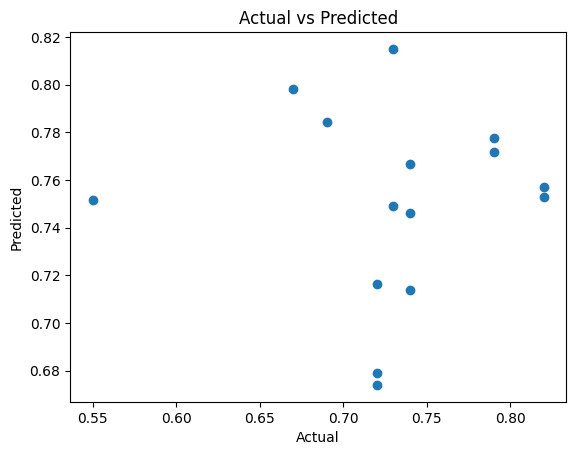

In [40]:
plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#Principal Component Analysis

In [41]:
from sklearn.preprocessing import StandardScaler

lx = x[['Fruit Category', 'Fruit Weight', 'Fruit Width', 'Fruit Length']].values.tolist()
ntx = tx[['Fruit Category', 'Fruit Weight', 'Fruit Width', 'Fruit Length']].values.tolist()

scaler = StandardScaler()
scaler.fit(lx)

lx = scaler.transform(lx)
ntx = scaler.transform(ntx)

n = len(lx)
X = np.array(lx)
Xt = np.transpose(X)
E = (Xt @ X)/n
val,vect = np.linalg.eig(E)

idx = val.argsort()[::-1]
val = val[idx]
vect = vect[:, idx]
print(val)
print(np.shape(vect))

[2.30480156 1.37021734 0.24812831 0.0768528 ]
(4, 4)


#Least Square Approximation

In [58]:
P = vect[:, :2]
R = X @ P
R = R.tolist()
for i in range(n):
  R[i].append(1)
R = np.array(R)
Rt = np.transpose(R)
xtx = Rt @ R
xty = Rt @ Y
inx=np.linalg.inv(xtx)
C=inx @ xty

def pls(temp):
  J = np.array(temp)
  nJ = J @ P
  temp = nJ.tolist()
  temp.append(1)
  J = np.array(temp)
  return np.dot(J,C)

#Testing the model

In [59]:
e = 0
for i in range(N):
  prd[i] = pls(ntx[i])
  j=act[i]-prd[i]
  e+=(j*j)

e=np.sqrt(e/N)
print('Root Mean Square Error')
print(e)

Root Mean Square Error
0.08726978964728342


#Visualization of Actual vs Predicted

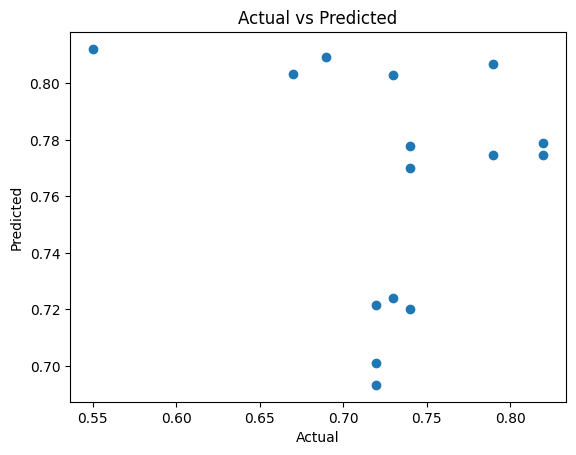

In [60]:
plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()